# **MÓDULO 47 - Tarea Series de Tiempo II**

___
# **Series de Tiempo II**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os

In [2]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import randn, seed
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARMA

In [3]:
df_apple = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\53_Módulo_47_Series_de_Tiempo_II\Modulo_47_Series_de_Tiempo_II\Analista de datos AAPL_2006-01-01_to_2018-01-01_M30.csv',
                       index_col='Date', parse_dates=True)
df_google = pd.read_csv(r'C:\Users\danielortega\OneDrive - HOTELERA YALKUITO SA DE CV\Desktop\No Borrar Daniel\30 Data Analyst - Curso\53_Módulo_47_Series_de_Tiempo_II\Modulo_47_Series_de_Tiempo_II\Analista de datos GOOGL_2006-01-01_to_2018-01-01_M31.csv',
                        index_col='Date', parse_dates=True)

## **Conceptos Preliminares**

**Autocorrelación**
- La función de autocorrelación (ACF) mide qué tan correlacionada una serie está con ella misma.
- Las unidades de la ACF son los diferentes periodos de tiempo (lags).
- Se le puede interpretar como una regresión de la serie cons sus lags anteriores.
- Los términos se pueden interpretar como una regresión simple, es decir, la contribución de un cambio en cada lag, mientras se mantienen a los demás constantes. 

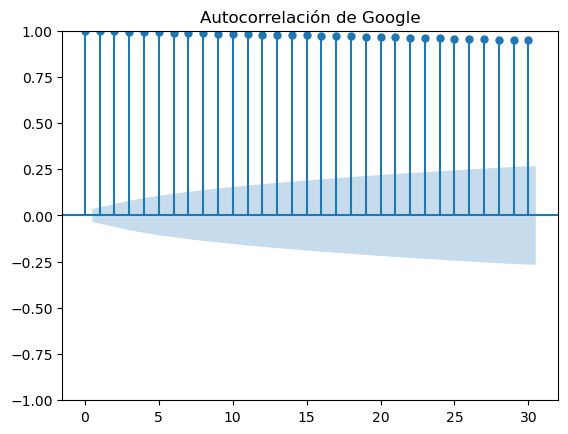

In [4]:
plot_acf(df_google['Close'], lags=30, title='Autocorrelación de Google')
plt.show()

## **Insights**
- La mayoría de lags están cerca del 1 lo que quiere decir que tienen alta importancia.
- Se puede ver además una tendencia a la baja, lo que nos indica que para la predicción, cada lag disminuye su fuerza (se incrementa el área sombrada).

___
# **Función Parcial de Autocorrelación**

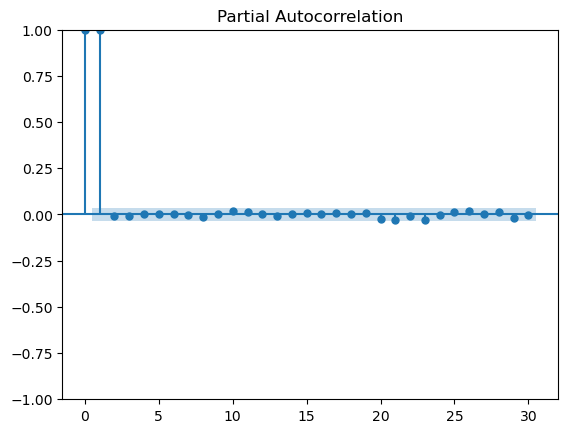

In [5]:
plot_pacf(df_google['Close'], lags=30)
plt.show()

## **Insights**
- Se como el t0 y el t1 tienen una alta correlación parcial (PACF), mientras que los demás periodos no tanto.

___
# **White Noise**


Text(0.5, 1.0, 'White Noise')

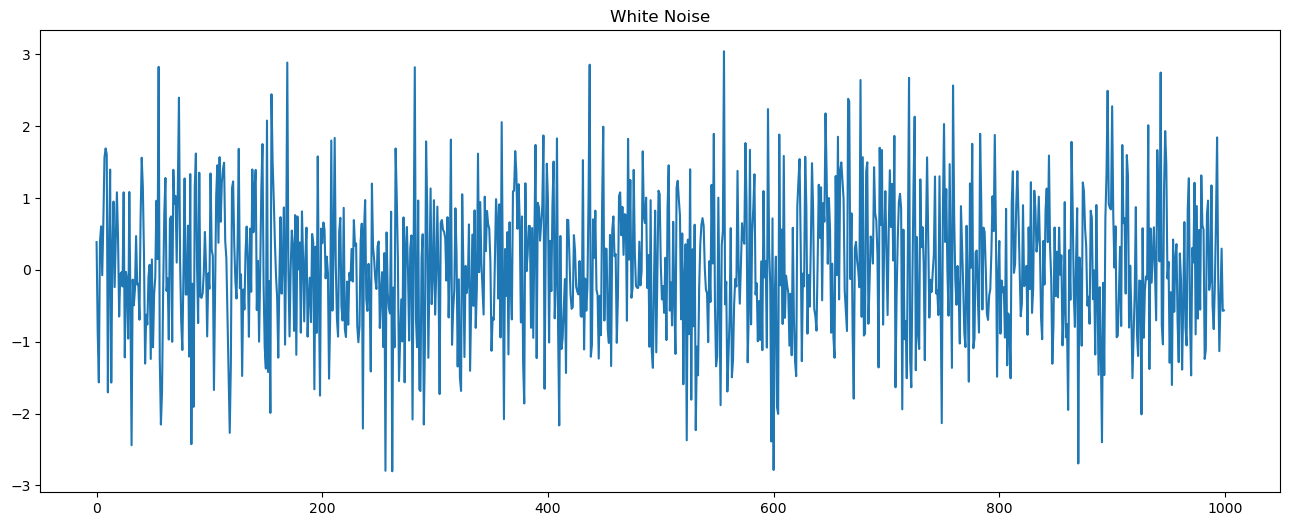

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
plt.plot(white_noise)
plt.title('White Noise')

- Visualización de autocorrelación de ruido blanco.
- Según las definiciones anteriore, debería ser cero, que es lo que se puede apreciar en el gráfico.

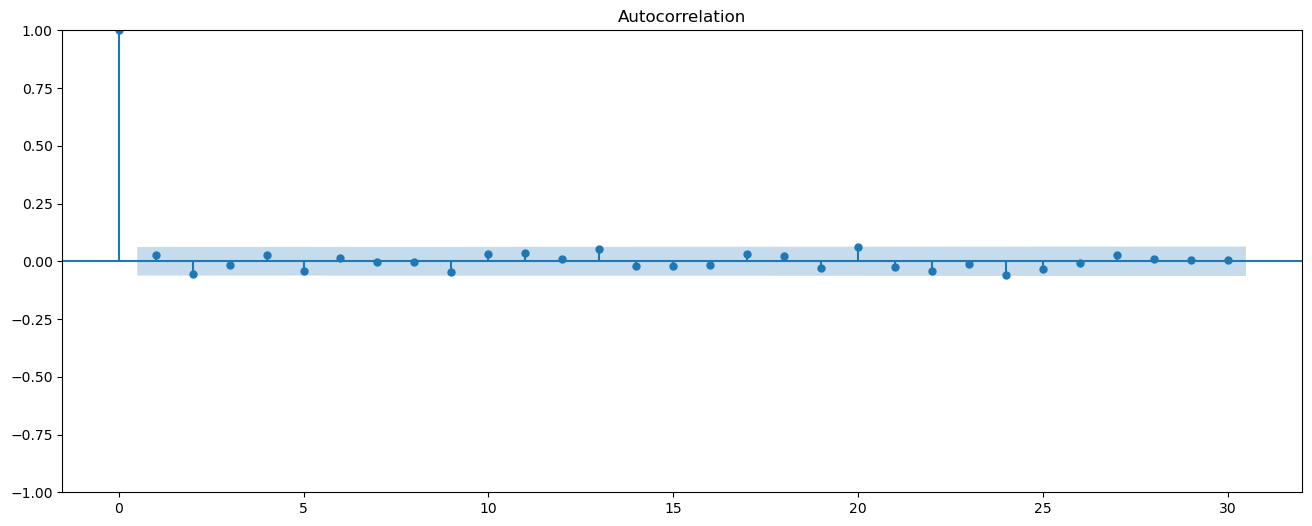

In [7]:
plot_acf(white_noise, lags=30)
plt.show()

___
# **Serie Geometric Brownian Motion**



In [8]:
from scipy.stats import norm
import pandas as pd

In [9]:
# Parámetros del proceso
delta = 0.25
dt = 0.1

# Punto inicio
x = 0.0
xini = 0

# Número de iteraciones
n = 10

**Genera los distintos puntos de la serie**

In [10]:
for k in range(n):
    x = x + norm.rvs(scale=delta**2*dt)
    print(f'Iteración {k}, valor {x}')

Iteración 0, valor 0.011175876236891306
Iteración 1, valor 0.01645714778284747
Iteración 2, valor 0.011593265726816137
Iteración 3, valor 0.015437475344007384
Iteración 4, valor 0.019382535394945097
Iteración 5, valor 0.018793253837005686
Iteración 6, valor 0.011974933304247214
Iteración 7, valor 0.01126066569930117
Iteración 8, valor 0.00038311883252268447
Iteración 9, valor -0.0011993775078667187


In [11]:
# Número de trayectorias
ntra = 10

# Número de iteraciones
n = 20

# Lista temporal para acumular todo
dfres_list = []


**Genera los puntos iniciales**

In [12]:
for i in range(ntra+1):
    df2 = {'traj': i, 'nsample': 0, 'sample': xini}
    dfres_list.append(df2)

**Generar las trayectorias en un DataFrame**

In [13]:
for i in range(ntra+1):
    x = xini  # inicializa en cada trayectoria
    for k in range(1, n+1):
        x = x + norm.rvs(scale=delta**2 * dt)
        df2 = {'traj': i, 'nsample': k, 'sample': x}
        dfres_list.append(df2)

**Convertimos todo a un DataFrame**

In [14]:
dfres = pd.DataFrame(dfres_list)

print(dfres.head(15))

    traj  nsample    sample
0      0        0  0.000000
1      1        0  0.000000
2      2        0  0.000000
3      3        0  0.000000
4      4        0  0.000000
5      5        0  0.000000
6      6        0  0.000000
7      7        0  0.000000
8      8        0  0.000000
9      9        0  0.000000
10    10        0  0.000000
11     0        1 -0.005205
12     0        2 -0.004858
13     0        3 -0.000659
14     0        4 -0.001512


**Plot de las muestras**

<Axes: xlabel='nsample', ylabel='sample'>

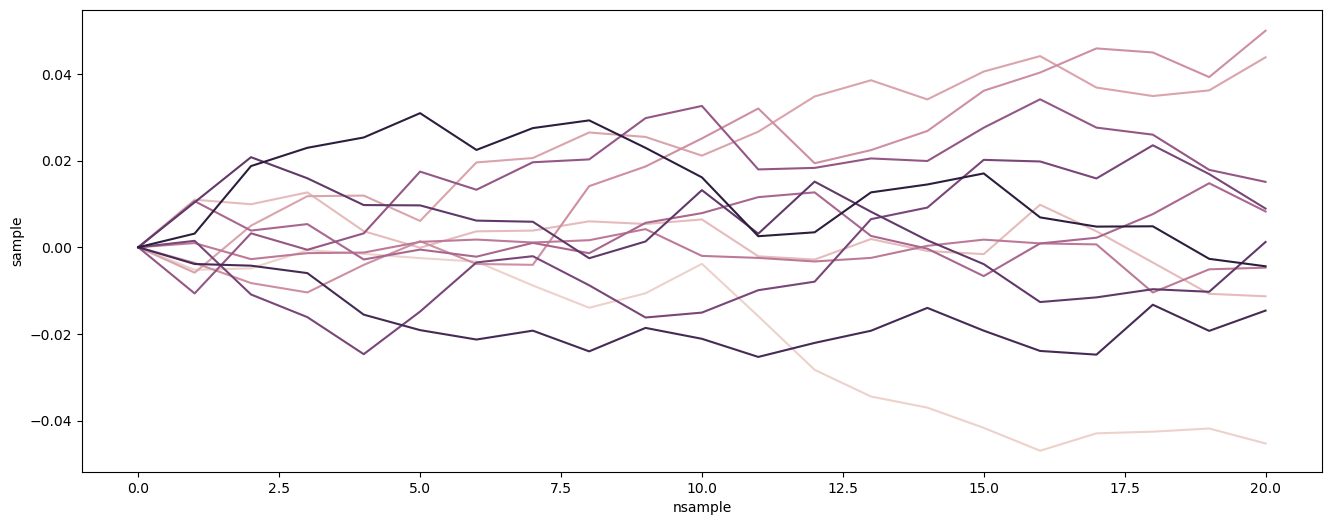

In [15]:
import seaborn as sns
sns.lineplot(data=dfres, x='nsample', y='sample', hue='traj', legend=None)

**Se pueden obtener las trayectorias**

In [16]:
pd.pivot_table(dfres, index='nsample', columns='traj', values='sample')

traj,0,1,2,3,4,5,6,7,8,9,10
nsample,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.005205,0.010974,-0.005862,-0.003611,0.000966,0.010637,-0.010643,0.001482,0.010371,-0.003857,0.003155
2,-0.004858,0.009924,0.004980,-0.008257,-0.002738,0.003849,0.003216,-0.010889,0.020780,-0.004246,0.018724
3,-0.000659,0.012654,0.011778,-0.010419,-0.001356,0.005345,-0.000583,-0.016115,0.015912,-0.005959,0.022944
4,-0.001512,0.003712,0.011923,-0.004071,-0.001223,-0.002817,0.003204,-0.024659,0.009736,-0.015542,0.025322
5,-0.002501,-0.000107,0.006075,0.001398,0.001241,-0.000537,0.017450,-0.014834,0.009661,-0.019111,0.030931
6,-0.003308,0.003670,0.019568,-0.003847,0.001777,-0.002173,0.013266,-0.003498,0.006149,-0.021281,0.022451
7,-0.008814,0.003845,0.020583,-0.004055,0.001095,0.001009,0.019608,-0.002060,0.005885,-0.019234,0.027487
8,-0.013958,0.005986,0.026478,0.014100,0.001631,-0.001372,0.020266,-0.008771,-0.002532,-0.024011,0.029267


**Se puede obtener las medias de las trayectorias**

In [17]:
pd.pivot_table(dfres, columns=['nsample'], aggfunc='mean')

nsample,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
sample,0.0,0.000764,0.002771,0.003049,0.00037,0.002697,0.002979,0.004123,0.00428,0.006173,...,0.003475,0.003577,0.005195,0.00493,0.006378,0.006664,0.005294,0.00567,0.003191,0.004271
traj,5.0,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000


_____
# **Serie de Reversión a la Media**



In [18]:
def mod_vasicek(r0, K, theta, sigma, T=1., N=10, seed=777):
    np.random.seed(seed)
    dt = T/float(N)
    rates = [r0]
    for i in range(N):
        dr = K*(theta - rates[-1])*dt + sigma*np.random.normal()
        rates.append(rates[-1] +dr)
    return range(N+1), rates


**Parámetros para la serie de tiempo**

In [19]:
r0= 0.1875
K = 0.2
theta = 0.04
sigma = 0.012
T = 10
seed = np.random.randint(100, 900)
N = 1000

**Llama a la función Vasicek**

In [20]:
x, y = mod_vasicek(r0, K, theta, sigma, T, N, seed)

**Generación de gráfica del modelo de Reversión a la media**

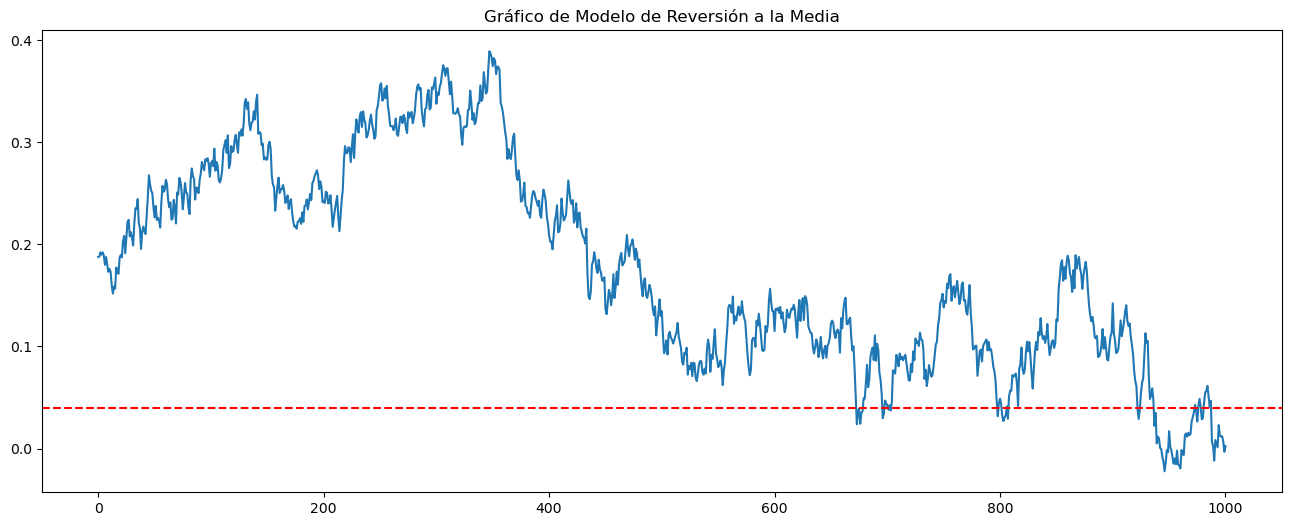

In [21]:
plt.plot(x,y)
plt.title('Gráfico de Modelo de Reversión a la Media')
plt.axhline(theta, color='red', linestyle='--')
plt.show()

## **Insights**

- Se puede ver el gráfico como se oscila alrededor de la media.
- Esto ocurre de manera aleatoria también.

_____

# **Serie de Tiempo Autoregresivo (AR)**



**Configuración de la Serie Autoregresiva AR**

- Se generarán  4 diferentes gráficas, con dos niveles de AR: AR(1) y AR(2).
- Se usa la función ArmaProcess, además de la función generate_sample

# **Generación de la Serie de Tiempo AR**

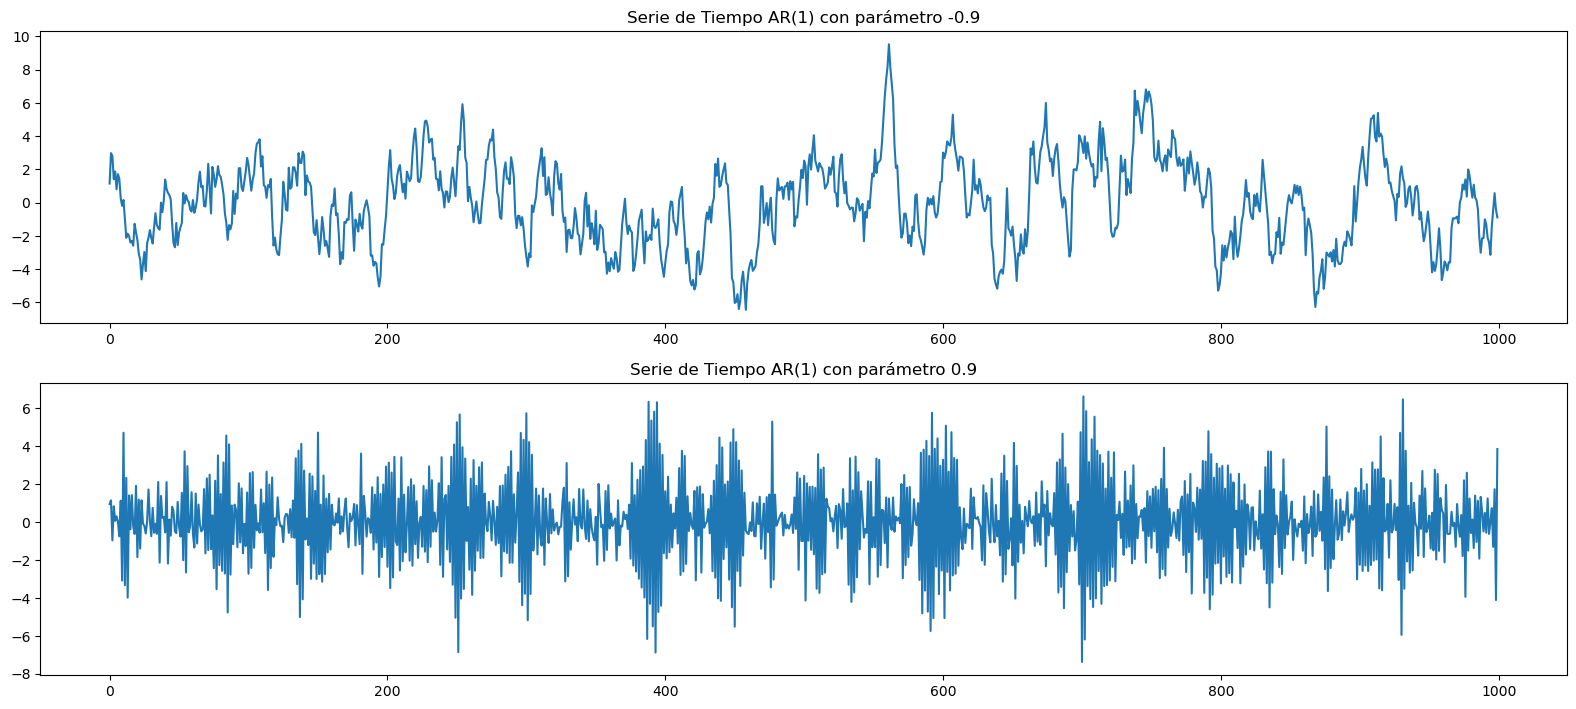

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from matplotlib import rcParams

rcParams['figure.figsize'] = (16, 14)

plt.subplot(4,1,1)
# AR(1) con parámetro -0.9
ar1 = np.array([1, -0.9])
ma1 = np.array([1])
AR1 = ArmaProcess(ar1, ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('Serie de Tiempo AR(1) con parámetro -0.9')
plt.plot(sim1)

# AR(1) con parámetro +0.9
plt.subplot(4,1,2)
ar2 = np.array([1, 0.9])
ma2 = np.array([1])
AR2 = ArmaProcess(ar2, ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('Serie de Tiempo AR(1) con parámetro 0.9')
plt.plot(sim2)

plt.tight_layout()
plt.show()



**Ahora se genera la misma serie, pero con AR(2)**

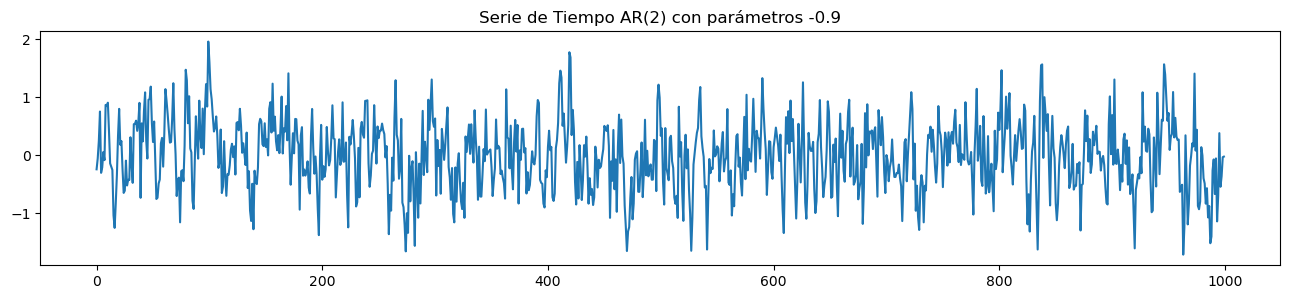

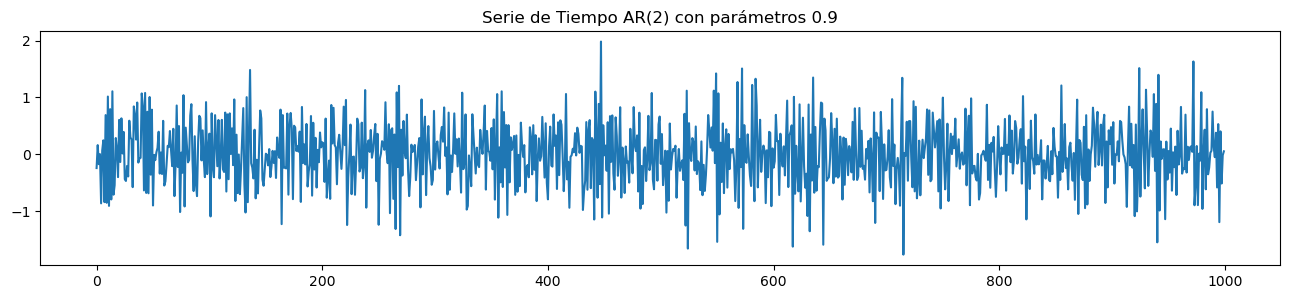

In [23]:
plt.subplot(4,1,3)
ar3 = np.array([2, -0.9])
ma3 = np.array([1])
AR3 = ArmaProcess(ar3, ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('Serie de Tiempo AR(2) con parámetros -0.9')
plt.plot(sim3)
plt.show()

# AR(2) con parámetros -0.9 
plt.subplot(4,1,4)
ar4 = np.array([2, 0.9])
ma4 = np.array([1])
AR4 = ArmaProcess(ar4, ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('Serie de Tiempo AR(2) con parámetros 0.9')
plt.plot(sim4)
plt.show()

# **Forecasting con AR**
- Se usa el model.fit para hacer la predicción automática.
- Se muestra como va iterando el proceso del fit hasta que llega un nivel de predicción adecuado.

In [24]:
# Order tiene los parámetros p y q del modelo AR y MA respectivamente

model = ARIMA(sim1, order=(1,0,0))  # (p,d,q) → aquí es AR(1)
result = model.fit()

print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1423.376
Date:                Thu, 28 Aug 2025   AIC                           2852.753
Time:                        16:39:17   BIC                           2867.476
Sample:                             0   HQIC                          2858.349
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0263      0.380     -0.069      0.945      -0.770       0.718
ar.L1          0.9165      0.013     72.220      0.000       0.892       0.941
sigma2         1.0071      0.045     22.457      0.0

**Después del fit, podemos revisar cuáles fueron los parámetros a los que se llegó luego de la predicción e incluso gráficar**
- Recordar que los modelos AR y MA tienen parámetros p y q y se refieren al número de lags.

Para la predicción, lo que hace el modelo es buscar automáticamente los mejores parámetros de la serie que se pueden ver acá:

In [25]:
print('u={} , φ={} '.format(result.params[0], result.params[1]))
print(result.summary())

u=-0.026267252643620263 , φ=0.9164944271182798 
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1423.376
Date:                Thu, 28 Aug 2025   AIC                           2852.753
Time:                        16:39:17   BIC                           2867.476
Sample:                             0   HQIC                          2858.349
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0263      0.380     -0.069      0.945      -0.770       0.718
ar.L1          0.9165      0.013     72.220      0.000       0.892       0.941
sigm

**Se muestra la predicción con un plot_predict**

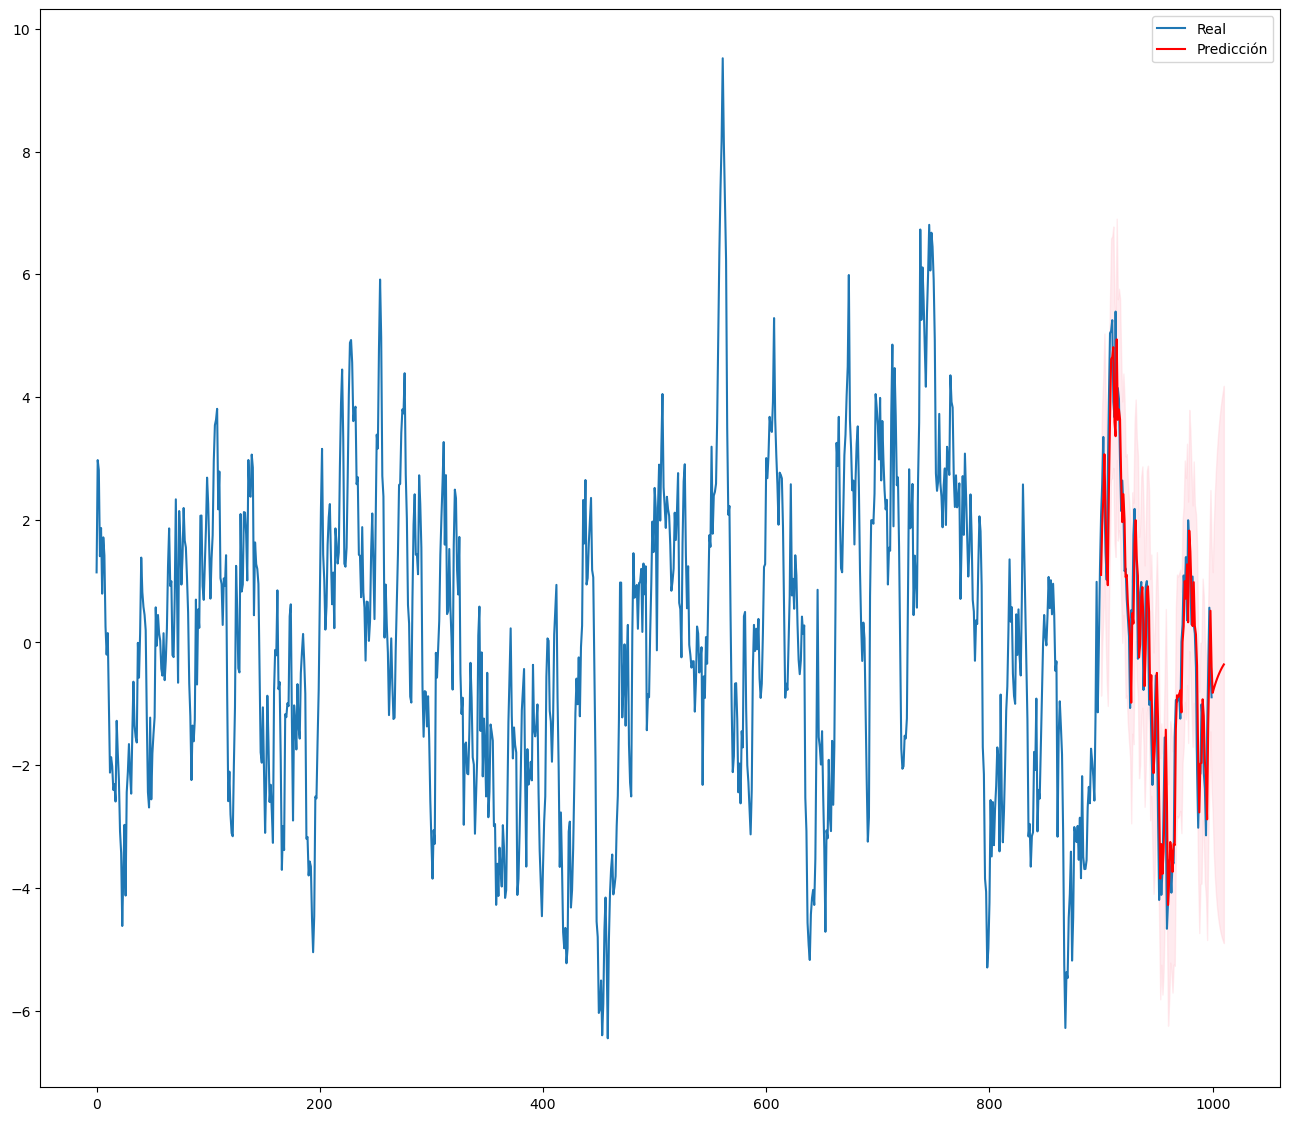

In [26]:
# convertir la serie simulada en pandas.Series con índice
sim1 = pd.Series(sim1)

# ahora entrenas tu modelo
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sim1, order=(1,0,0))
result = model.fit()

# predicciones
pred = result.get_prediction(start=900, end=1010, dynamic=False)

# serie real
plt.plot(sim1, label="Real")

# predicción puntual
plt.plot(pred.predicted_mean, label="Predicción", color="red")

# intervalo de confianza
conf_int = pred.conf_int()
plt.fill_between(conf_int.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color="pink", alpha=0.3)

plt.legend()
plt.show()

**Se evalúa con RMSE**

In [27]:
y_true = sim1[900:1011].values
y_pred = result.predict(start=900, end=1010).values

# Ajustar al mínimo largo común
min_len = min(len(y_true), len(y_pred))
y_true = y_true[:min_len]
y_pred = y_pred[:min_len]

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE =", rmse)


RMSE = 0.8734835061644307


**Predicción de Precio de Google**

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\danielortega\AppData\Local\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



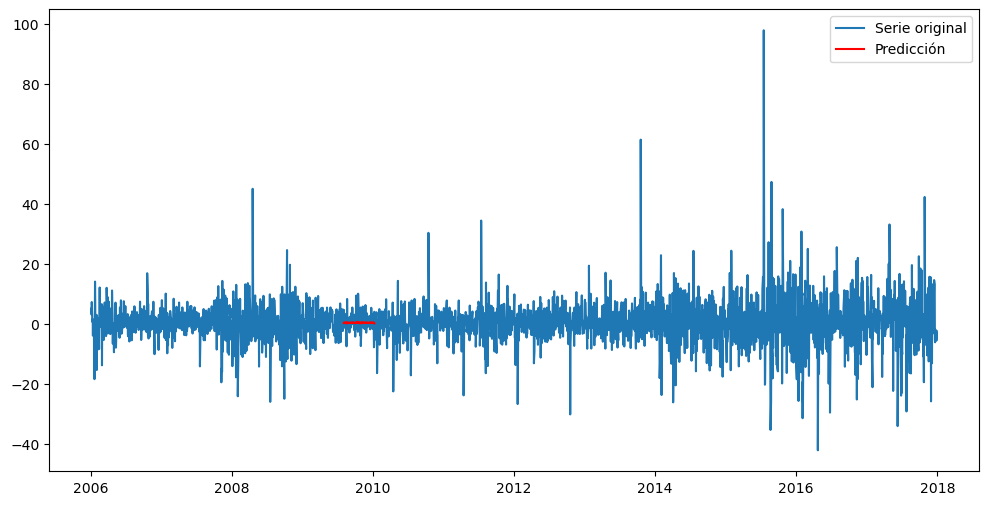

In [28]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Diferenciamos la serie (igual que antes con .diff())
serie = df_google['Close'].diff().dropna()

# Ajustamos un AR(1) que sería equivalente a ARMA(1,0)
model = ARIMA(serie, order=(1,0,0))
res = model.fit()

# Predicción (usa el índice de pandas en vez de índices numéricos)
start = 900
end = 1010
pred = res.predict(start=start, end=end)

# Graficamos
plt.figure(figsize=(12,6))
plt.plot(serie.index, serie, label="Serie original")
plt.plot(serie.index[start:end+1], pred, label="Predicción", color="red")
plt.legend()
plt.show()
